In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [149]:
dataset = pd.read_csv('D:/Git/ml_data.mining/data/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


Балансировка

In [150]:
dataset['Exited'].value_counts()

Exited
0    7964
1    2038
Name: count, dtype: int64

In [151]:
df_counts = dataset['Exited'].value_counts()
for_del = df_counts.loc[0] - df_counts.loc[1]
indexq = dataset[dataset['Exited']==0][:for_del].index
dataset1 = dataset.drop(indexq)

In [152]:
dataset1['Exited'].value_counts()

Exited
1    2038
0    2038
Name: count, dtype: int64

Нормализация

In [153]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

dataset1[['mmAge', 'mmCreditScore', 'mmBalance']] = scaler_mm.fit_transform(dataset1[['Age', 'CreditScore', 'Balance']])
dataset1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,mmAge,mmCreditScore,mmBalance
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1,0.363636,0.538,0.000000
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1,0.363636,0.304,0.636357
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1,0.393939,0.590,0.453394
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1,0.166667,0.052,0.458540
16,17,15737452,Romeo,653,Germany,Male,58.0,1,132602.88,1,1.0,0.0,5097.67,1,0.606061,0.606,0.528513


Удаление ненужных столбцов

In [154]:
dataset1 = dataset1.drop(['RowNumber','CustomerId', 'Surname', 'Gender', 'EstimatedSalary', 'Age', 'CreditScore', 'Balance'], axis=1)

Удаление строк с пропущенными значениями

In [155]:
dataset1 = dataset1.dropna()

Перевод категориальных признаков в численные

In [156]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
dataset1[['Geography']] = enc.fit_transform(dataset1[['Geography']])
dataset1.head()

,Geography,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,mmAge,mmCreditScore,mmBalance
0,0.0,2,1,1.0,1.0,1,0.363636,0.538,0.000000
2,0.0,8,3,1.0,0.0,1,0.363636,0.304,0.636357
5,2.0,8,2,1.0,0.0,1,0.393939,0.590,0.453394
7,1.0,4,4,1.0,0.0,1,0.166667,0.052,0.458540
16,1.0,1,1,1.0,0.0,1,0.606061,0.606,0.528513


In [157]:
vals = dataset1["Exited"].unique()
vals

array([1, 0])

In [158]:
dataset1.head()

,Geography,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,mmAge,mmCreditScore,mmBalance
0,0.0,2,1,1.0,1.0,1,0.363636,0.538,0.000000
2,0.0,8,3,1.0,0.0,1,0.363636,0.304,0.636357
5,2.0,8,2,1.0,0.0,1,0.393939,0.590,0.453394
7,1.0,4,4,1.0,0.0,1,0.166667,0.052,0.458540
16,1.0,1,1,1.0,0.0,1,0.606061,0.606,0.528513


In [159]:
cols_for_clusters = ['Geography', 'Tenure', 'NumOfProducts', 'HasCrCard',  'IsActiveMember', 'Exited', 'mmAge', 'mmCreditScore', 'mmBalance']

df= dataset1[cols_for_clusters].copy()

In [160]:
df.head()

,Geography,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited,mmAge,mmCreditScore,mmBalance
0,0.0,2,1,1.0,1.0,1,0.363636,0.538,0.000000
2,0.0,8,3,1.0,0.0,1,0.363636,0.304,0.636357
5,2.0,8,2,1.0,0.0,1,0.393939,0.590,0.453394
7,1.0,4,4,1.0,0.0,1,0.166667,0.052,0.458540
16,1.0,1,1,1.0,0.0,1,0.606061,0.606,0.528513


In [161]:
X = df
y = dataset1['Exited']

In [162]:
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans

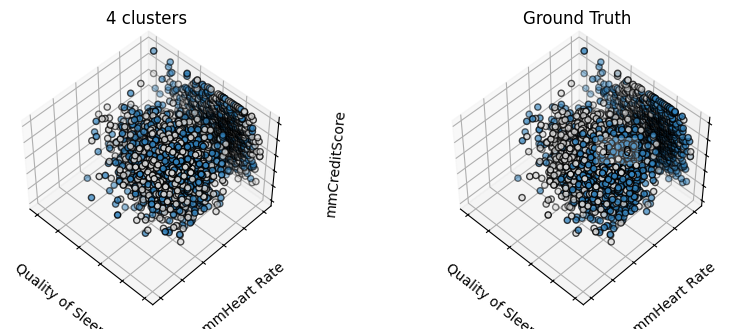

In [163]:
estimators = [
    ("k_means_exited_2", KMeans(n_clusters=2))
]

fig = plt.figure(figsize=(10, 8))
titles = ["4 clusters", "2 clusters"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["mmAge"], X["mmBalance"], X["mmCreditScore"], c=labels.astype(float), cmap='tab20c', edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Quality of Sleep")
    ax.set_ylabel("mmHeart Rate")
    ax.set_zlabel("mmCreditScore")
    ax.set_title(title)

ax = fig.add_subplot(2, 2, 2, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1)]:
    ds = dataset1[dataset1["Exited"]==name]
    ax.text3D(
        ds["mmAge"].mean(),
        ds["mmBalance"].mean(),
        ds["mmCreditScore"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["mmAge"], X["mmBalance"], X["mmCreditScore"], c=y, cmap='tab20c', edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Quality of Sleep")
ax.set_ylabel("mmHeart Rate")
ax.set_zlabel("Sleep Duration")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [164]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

n_clusters = np.arange(2, 21)

In [165]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.48
Adjusted Rand Index: 0.00


In [166]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n


In [167]:
best_metric

[np.int64(18),
 np.float64(0.17212760788592524),
 0.01777199395849009,
 array([[ 1.02247191e+00,  5.73033708e+00,  3.01123596e+00,
          6.74157303e-01,  4.71910112e-01,  9.88764045e-01,
          3.91045284e-01,  6.01348315e-01,  3.74461523e-01],
        [ 1.49812734e+00,  1.80898876e+00,  1.56928839e+00,
          7.07865169e-01,  5.09363296e-01,  3.82022472e-01,
          3.45987970e-01,  6.04389513e-01,  3.43856960e-01],
        [ 1.40703518e-01,  8.00000000e+00,  1.44723618e+00,
          6.93467337e-01,  5.97989950e-01,  3.01507538e-01,
          3.51301964e-01,  5.84301508e-01,  3.18757115e-01],
        [ 1.60546875e+00,  3.73437500e+00,  1.37109375e+00,
          6.95312500e-01,  4.45312500e-01,  5.66406250e-01,
          3.53515625e-01,  6.11539063e-01,  3.40041945e-01],
        [ 3.43612335e-01,  4.68722467e+00,  1.09251101e+00,
          6.82819383e-01,  2.64317181e-01,  8.81057269e-01,
          3.89400614e-01,  5.93964758e-01,  3.52777156e-01],
        [ 1.40363636e+00

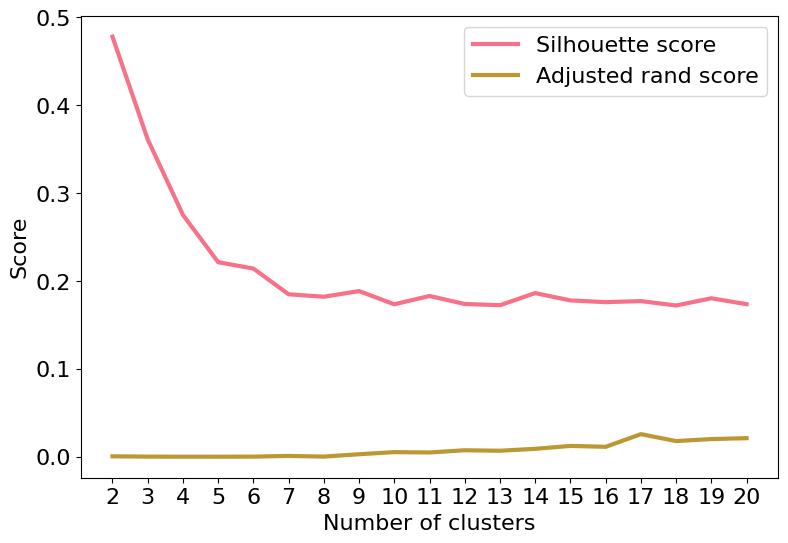

In [168]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

In [169]:
from scipy.cluster.hierarchy import linkage, dendrogram

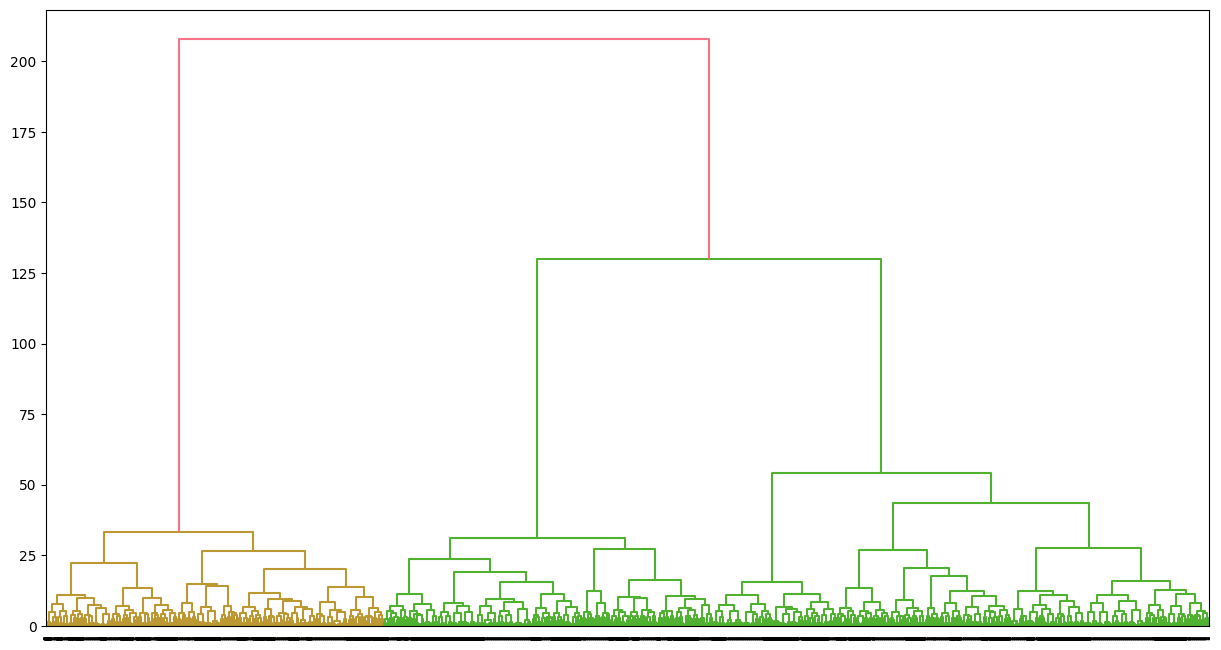

In [170]:
samples = df.values

mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

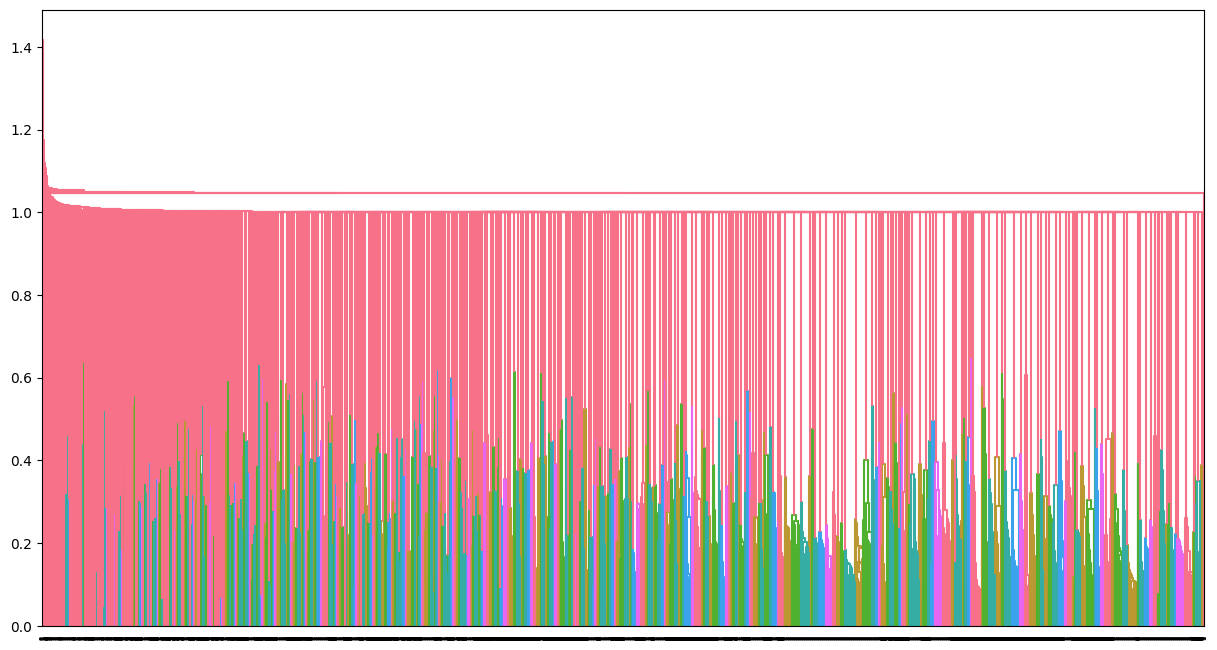

In [171]:
samples = df.values

mergings = linkage(samples, method='single')

plt.figure(figsize=(15, 8))
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

In [172]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import mutual_info_score

In [173]:
mins = X.shape[1]

In [ ]:
db = DBSCAN(eps=0.8, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = ['#562C2C', '#F2542D', '#F5DFBB', '#0E9594', '#127475', '#FF1053', '#6C6EA0', '#66C7F4', '#C1CAD6', '#FFFFFF', '#462749', '#E086D3', '#9DA3A4', '#604D53', '#5B507A', '#A53860', '#FFA5AB', '#FFBA49', '#06A77D', '#E7A977']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["mmAge"], xy["mmCreditScore"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["mmAge"], xy["mmCreditScore"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


['#562C2C', '#F2542D', '#F5DFBB', '#0E9594', '#127475', '#FF1053', '#6C6EA0', '#66C7F4', '#C1CAD6', '#FFFFFF', '#462749', '#E086D3', '#9DA3A4', '#604D53', '#5B507A', '#A53860', '#FFA5AB', '#FFBA49', '#06A77D', '#E7A977']


KeyError: 'Sleep Duration'

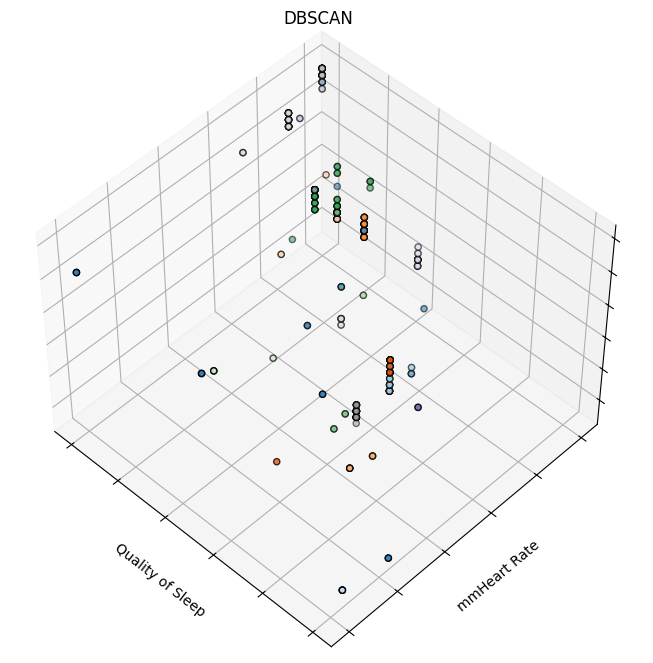

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["Quality of Sleep"], X["mmHeart Rate"], X["Sleep Duration"], c=labels.astype(float), cmap='tab20c', edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Quality of Sleep")
ax.set_ylabel("mmHeart Rate")
ax.set_zlabel("Sleep Duratioh")
ax.set_title("DBSCAN")

plt.show()

In [ ]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.72
Adjusted Rand Index: 0.50
